# Regression Evaluation Metrics – MAE, MSE, RMSE, R², Adjusted R²

## 1. Objective

When you train **any regression model** (linear regression, random forest, XGBoost, etc.), you need to answer:

> “How good is this model, quantitatively?”

This document explains **five core regression metrics** in a rigorous and structured way:

- **MAE** – Mean Absolute Error  
- **MSE** – Mean Squared Error  
- **RMSE** – Root Mean Squared Error  
- **R²** – Coefficient of Determination  
- **Adjusted R²** – R² corrected for number of features  

with:

- **Formulas**
- **Geometric / intuitive interpretation**
- **Units**
- **Pros / cons**
- **When to use which**

---

## 2. Basic setup and notation

We assume a regression dataset:

- Inputs: \( x_i \) (can be single feature or feature vector)
- True targets: \( y_i \)
- Model predictions: \( \hat{y}_i \)

for \( i = 1, 2, \dots, n \).

We’ll use:

- \( n \): number of data points (rows)
- \( \bar{y} = \dfrac{1}{n}\sum_{i=1}^n y_i \): mean of target

---

## 3. MAE – Mean Absolute Error

### 3.1 Definition

Mean Absolute Error is the **average absolute difference** between true values and predictions.

\[
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \lvert y_i - \hat{y}_i \rvert
\]

### 3.2 Intuition

- For each point, error = vertical distance between true point and prediction.
- MAE takes **absolute value**, then averages.
- It answers: “On average, how far (in raw units) are my predictions from the true values?”

### 3.3 Units

- **Same units as \(y\)**.  
  If \(y\) is salary in LPA, MAE is “LPA of average error”.

### 3.4 Pros

- Easy to interpret: “Model is off by ~1.2 LPA on average”.
- **Robust to outliers** compared to MSE/RMSE (no squaring).
- Symmetric: over- and under-predictions weighted equally.

### 3.5 Cons

- Absolute value function is **not differentiable** at 0 → inconvenient for some gradient-based optimization (though in practice there are work-arounds).
- Penalizes large errors **linearly**, not heavily.

---

## 4. MSE – Mean Squared Error

### 4.1 Definition

Mean Squared Error is the **average of squared errors**.

\[
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\]

### 4.2 Intuition

- For each point: squared error = “area of a square” whose side is the error.
- Big errors get **penalized much more** (quadratic).
- Very useful as a **loss function** in training (smooth, differentiable).

### 4.3 Units

- **Square of units of \(y\)**.  
  If \(y\) is in LPA, MSE is in \( \text{LPA}^2 \).  
  This is not intuitive to interpret as a direct “error”.

### 4.4 Pros

- **Fully differentiable** → perfect for gradient descent-based methods.
- Strongly punishes outliers → model will try to avoid a few huge mistakes.
- Standard in many theoretical derivations.

### 4.5 Cons

- Units are squared → difficult to communicate error to non-technical people.
- **Very sensitive to outliers**; one large error can dominate the metric.

---

## 5. RMSE – Root Mean Squared Error

### 5.1 Definition

RMSE is simply the square root of MSE:

\[
\text{RMSE} = \sqrt{\text{MSE}}
= \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 }
\]

### 5.2 Intuition

- Same behavior as MSE (squared errors), but then we “undo the square” by taking square root.
- RMSE tells you roughly: “Typical magnitude of error”, but still **emphasizes large errors**.

### 5.3 Units

- Same units as \(y\) (e.g., LPA).  
  Much more interpretable than MSE.

### 5.4 Pros

- Easier to interpret than MSE.
- Still strongly penalizes large errors.
- Very common in Kaggle, deep learning, etc.

### 5.5 Cons

- Still **sensitive to outliers** (inherits MSE’s behavior).
- Harder to optimize directly than MSE (but we usually optimize MSE and report RMSE).

---

## 6. R² – Coefficient of Determination

R² measures **how much better your model is** compared to a **dumb baseline** that always predicts the **mean of \(y\)**.

### 6.1 Definitions

First define three sums:

- **Total Sum of Squares (SST)** – total variance in the data:
  \[
  \text{SST} = \sum_{i=1}^{n} (y_i - \bar{y})^2
  \]

- **Residual Sum of Squares (SSR or SSE)** – error of your model:
  \[
  \text{SSR} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  \]

Then R²:

\[
R^2 = 1 - \frac{\text{SSR}}{\text{SST}}
\]

### 6.2 Intuition

- **Baseline model**: always predict \( \bar{y} \). Its error = SST.
- **Your model**: prediction error = SSR.

R² is:

\[
R^2 = 1 - \frac{\text{error of your model}}{\text{error of mean-only model}}
\]

Interpretation:

- \( R^2 = 0 \): your model is **no better** than just predicting mean.
- \( R^2 = 1 \): perfect predictions (SSR = 0).
- \( R^2 < 0 \): your model is **worse than mean** (SSR > SST).

Another interpretation:

> R² is the fraction of variance in \(y\) that is explained by model inputs \(X\).

Example:  
If \( R^2 = 0.8 \), then “80% of variation in salary is explained by features; 20% is unexplained noise/other factors.”

### 6.3 Pros

- **Scale-free**: between ~(-∞, 1].
- Easy to compare across models on **same dataset**.
- Strong intuitive meaning: “percentage of variance explained”.

### 6.4 Cons

- Can become **negative** if model is very bad (worse than baseline).
- **Always increases or stays same** when you add more features (even useless ones) → encourages overfitting.
- For non-linear models or models without intercept, some weird behaviors can appear.

---

## 7. Adjusted R²

### 7.1 Motivation

Problem: **R² always goes up or stays same** as you add more features, even if they are useless random noise.

Solution: **Adjusted R²** adds a penalty for additional features.

### 7.2 Formula

Let:

- \( n \): number of data points
- \( k \): number of **independent variables/features** (not including intercept)

Then:

\[
R^2_{\text{adj}} = 1
- \left(1 - R^2\right)\frac{n - 1}{n - k - 1}
\]

### 7.3 Intuition

- If you add a **useful feature**, R² goes up a lot → Adjusted R² will also increase.
- If you add a **useless/noisy feature**, R² may go up slightly, but the penalty term will reduce Adjusted R² → it can **decrease**.

So Adjusted R² answers:

> “How much variance is explained, **after adjusting for number of features**?”

### 7.4 Behavior

Consider two cases when adding a new feature:

1. **Feature is useless (random)**  
   - R²: slightly ↑ or ~same  
   - \(k\): ↑  
   - Penalty increases → \(R^2_{\text{adj}}\) **decreases**

2. **Feature is useful (strongly predictive)**  
   - R²: increases significantly  
   - Penalty can’t cancel that → \(R^2_{\text{adj}}\) **increases**

### 7.5 Pros / Cons

**Pros**

- Better for **model comparison** when number of features differ.
- Penalizes complexity → discourages overfitting.

**Cons**

- Still just a summary statistic; doesn’t replace cross-validation.
- Not directly interpretable as “variance explained” (that’s R²); but often close.

---

## 8. Summary table – comparison

| Metric  | Formula (idea)                              | Units     | Outlier sensitivity | Use case                                     |
|--------|----------------------------------------------|-----------|----------------------|----------------------------------------------|
| MAE    | mean of \(|y - \hat{y}|\)                    | same as y | low–medium          | When you want robust, easy-to-interpret error |
| MSE    | mean of \((y - \hat{y})^2\)                  | y²        | high                | As training loss; theory; strongly punish big errors |
| RMSE   | \(\sqrt{\text{MSE}}\)                        | same as y | high                | Reporting performance, similar to MSE but interpretable |
| R²     | \(1 - \text{SSR}/\text{SST}\)                | none      | depends on SSR      | Compare to baseline; variance explained      |
| Adj R² | R² with \((n, k)\) penalty                   | none      | —                    | Compare models with different # of features  |

---

## 9. Which metric to use when?

- **For training / optimization**  
  - Use **MSE** (or variants: MAE, Huber, etc).  
  - In standard linear regression, minimizing MSE ⇒ OLS.

- **For reporting “average error” in units of y**  
  - **MAE** and **RMSE** are good.  
  - MAE if you care less about outliers; RMSE if big mistakes are very costly.

- **For “how much variance is explained?”**  
  - Use **R²**.  
  - If comparing models with different number of features → also look at **Adjusted R²**.

- **If dataset has many outliers**  
  - MAE (or a robust loss) is usually safer than MSE/RMSE.

---

## 10. Scikit-learn implementation

Example: CGPA → Package (LPA) regression.

```python
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Example data
data = {
    "CGPA":    [6.6, 7.5, 8.1, 5.9, 7.0, 8.4, 6.8, 9.0, 5.5, 7.8],
    "Package": [3.0, 4.2, 4.5, 2.5, 3.7, 4.6, 3.2, 5.1, 2.2, 4.0]
}
df = pd.DataFrame(data)

X = df[["CGPA"]]
y = df["Package"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on test set
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

n = len(y_test)
k = X_test.shape[1]  # number of features
r2_adj = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)
print("Adj R²:", r2_adj)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

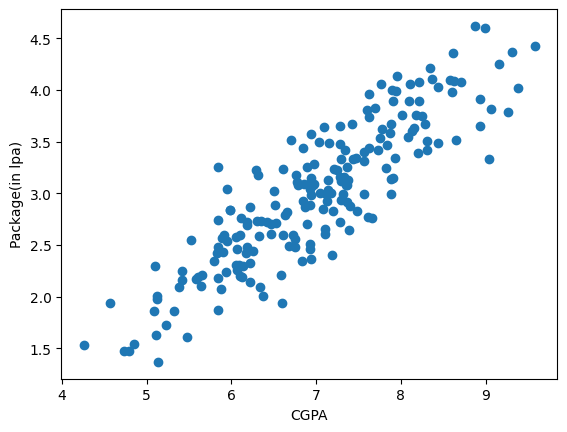

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [ ]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

Text(0, 0.5, 'Package(in lpa)')

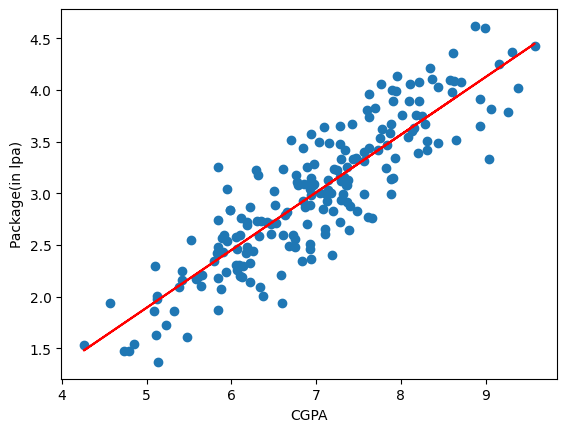

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
LinearRegression()
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = lr.predict(X_test)
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [ ]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [ ]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [ ]:
print("MSE",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE 0.780730147510384


In [ ]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [ ]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [ ]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.736058,3.26
1,5.12,0.479208,1.98
2,7.82,0.390722,3.25
3,7.42,0.046472,3.67
4,6.94,0.675098,3.57


Text(0, 0.5, 'Package(in lpa)')

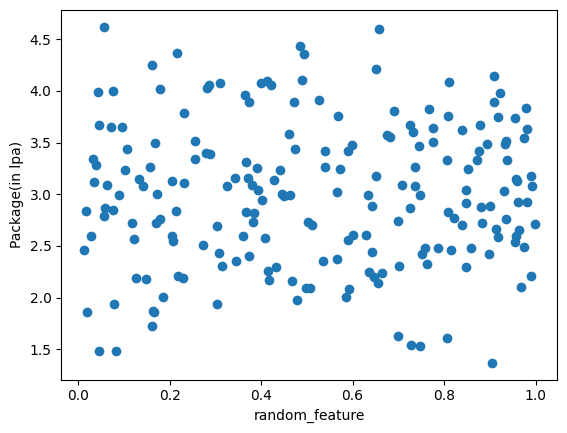

In [ ]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [ ]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)
LinearRegression()
y_pred = lr.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7823052545247515


In [ ]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7705379709855489

In [ ]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

Text(0, 0.5, 'Package(in lpa)')

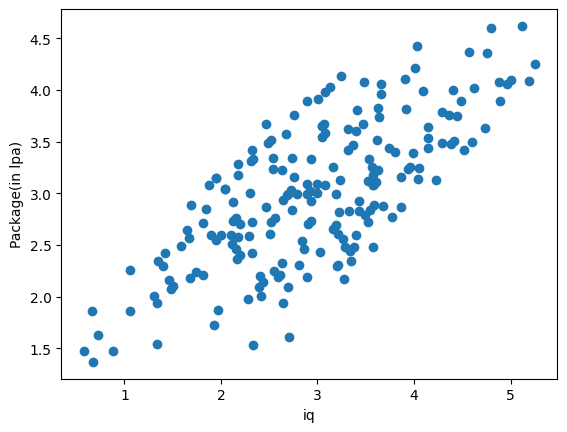

In [ ]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [ ]:
np.random.randint(-100,100)

-85

In [ ]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8269506503332404


In [ ]:

1 - ((1-r2)*(40-1)/(40-1-2))


0.8175966314323345